<a href="https://colab.research.google.com/github/sejallotliker/Advanced_python/blob/main/uber_data_request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This colab file contains data of uber request from different people in the city of bangalore from 2 locations:
1. Airport
2. City

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/JNCASR/Sem-4/Intro_to_ML/My_practice_ML/uber.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [ ]:
df['Pickup point'].value_counts()

,count
Pickup point,
City,3507
Airport,3238


In [ ]:
df.shape

(6745, 6)

In [ ]:
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


In [ ]:
df['Driver id'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [ ]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
df['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [ ]:
#To do encoding for Quality column good = 1 and bad = 0
df['Status']= df['Status'].replace(['Trip Completed', 'No Cars Available', 'Cancelled'], [2, 1,0])
df['Status'].unique()

<ipython-input-25-db8e5e7ef880>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status']= df['Status'].replace(['Trip Completed', 'No Cars Available', 'Cancelled'], [2, 1,0])


array([2, 0, 1])

#**Problem statement** : To predict given driver id and pickup point, will the driver complete the trip or will he cancle the trip or will he say car is not available


In [ ]:
features = ['Pickup point', 'Driver id']
X = df[features]
y = df['Status']

In [ ]:
X.head()

,Pickup point,Driver id
0,Airport,1.0
1,Airport,1.0
2,City,1.0
3,Airport,1.0
4,City,1.0


In [ ]:
#To split the data into train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

Numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

Categorical_preprocessor = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)



In [ ]:
#Numerical and categorical data:

Numerical_X = X.select_dtypes(include=['int64', 'float64']).columns
Categorical_X = X.select_dtypes(include=['object']).columns

In [ ]:
Column_transformer = ColumnTransformer(
    transformers=[
        ('num', Numerical_preprocessor, Numerical_X),
        ('cat', Categorical_preprocessor, Categorical_X)
    ]
)

In [ ]:
preprocessed_X = Column_transformer.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

Full_pipeline = Pipeline(
    steps=[
        ('preprocessor', Column_transformer),
        ('classifier', LogisticRegression())
    ]
)

In [ ]:
Full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Driver id'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Pickup point'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = Full_pipeline.predict(X_test)

###To check the accuracy of the model

In [ ]:
from sklearn.metrics import r2_score

r2 =r2_score(y_test, y_pred)
r2
#-ve R2 score implies that the model is not working well

-0.7622892785544151

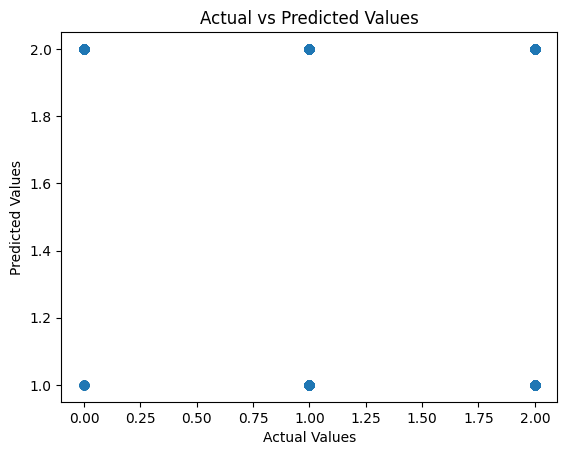

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
#To use logistic regression:

from sklearn.linear_model import LogisticRegression

Full_pipeline = Pipeline(
    steps=[
        ('preprocessor', Column_transformer),
        ('classifier', LogisticRegression())
    ]
)


Full_pipeline.fit(X_train, y_train)
y_pred = Full_pipeline.predict(X_test)

r2 =r2_score(y_test, y_pred)
r2

-0.7622892785544151